In [4]:
%pylab inline
import pandas as pd
df = pd.read_pickle("data/to_pickle.pk1.xz")


Populating the interactive namespace from numpy and matplotlib


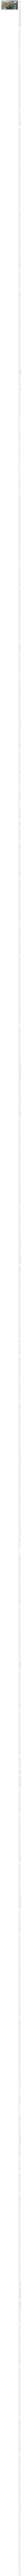

In [12]:
def filter_Square(locaition_list):
    im = imread("C:\EXELLENTIM\paths0.png")
    im_size = im.shape
    width = im_size[1]
    height = im_size[0]
    num_segmentation = 10
    for i in locaition_list:
        r = i[1]
        c = i[0]
        top_left = (c * width / num_segmentation , (r + 1) * height / num_segmentation)
        bottom_right = ((c + 1) * width / num_segmentation, r * height / num_segmentation)
        points_in_square = df[(df.x.between(top_left[0], bottom_right[0])) & (df.y.between(bottom_right[1], top_left[1]))] #all the point in the square
        points_in_square = points_in_square.groupby(['filename', 'obj']).size()
#         points_in_square = points_in_square.head(15)
        df_by_obj = df.set_index(['filename', 'obj']).sort_index()
        imshow(im)
        for t in points_in_square.index:
            s_o = df_by_obj.loc[t]
            plot(s_o.x, s_o.y, label = t[1])
        legend(loc=9, bbox_to_anchor=(1.1, 1))
filter_Square([(0, 5)])